# Importing Libraries and Data

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os
import warnings
warnings.filterwarnings('ignore')

In [28]:
new_app = pd.read_csv('application_data.csv')
pre_app = pd.read_csv('previous_application.csv')

In [8]:
new_app.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

# Checking Data In Both Files

In [32]:
new_app.shape

(307511, 122)

In [11]:
new_app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
new_app.tail()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307510,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,1.0


In [26]:
new_app.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [27]:
new_app.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [18]:
new_app.agg(['count','size'])

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511,307511,307511,307511,307511,307511,307511,307511,307511,307499,...,307511,307511,307511,307511,265992,265992,265992,265992,265992,265992
size,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,...,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511


In [34]:
pre_app.dtypes.value_counts()

object     16
float64    15
int64       6
dtype: int64

In [35]:
pre_app.shape

(1670214, 37)

In [36]:
pre_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
pre_app.tail()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,...,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,...,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,...,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0
1670213,2418762,261212,Cash loans,16431.300,360000.0,360000.0,NaN,360000.0,SUNDAY,10,...,XNA,48.0,middle,Cash X-Sell: middle,365243.0,-1163.0,247.0,-443.0,-423.0,0.0


In [38]:
pre_app.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [39]:
pre_app.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115833,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [40]:
pre_app.agg(['count','size'])

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1670214,1670214,1670214,1297979,1670214,1670213,774370,1284699,1670214,1670214,...,1670214,1297984,1670214,1669868,997149,997149,997149,997149,997149,997149
size,1670214,1670214,1670214,1670214,1670214,1670214,1670214,1670214,1670214,1670214,...,1670214,1670214,1670214,1670214,1670214,1670214,1670214,1670214,1670214,1670214


# Data Analysis

In [21]:
col_null_prcnt = round(new_app.isnull().sum()/len(new_app.index)*100,2)
col_null_prcnt

SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     13.5
AMT_REQ_CREDIT_BUREAU_WEEK    13.5
AMT_REQ_CREDIT_BUREAU_MON     13.5
AMT_REQ_CREDIT_BUREAU_QRT     13.5
AMT_REQ_CREDIT_BUREAU_YEAR    13.5
Length: 122, dtype: float64

In [23]:
col_null_prcnt = col_null_prcnt[col_null_prcnt > 0]
col_null_prcnt

AMT_GOODS_PRICE                0.09
NAME_TYPE_SUITE                0.42
OWN_CAR_AGE                   65.99
OCCUPATION_TYPE               31.35
EXT_SOURCE_1                  56.38
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     13.50
AMT_REQ_CREDIT_BUREAU_WEEK    13.50
AMT_REQ_CREDIT_BUREAU_MON     13.50
AMT_REQ_CREDIT_BUREAU_QRT     13.50
AMT_REQ_CREDIT_BUREAU_YEAR    13.50
Length: 64, dtype: float64

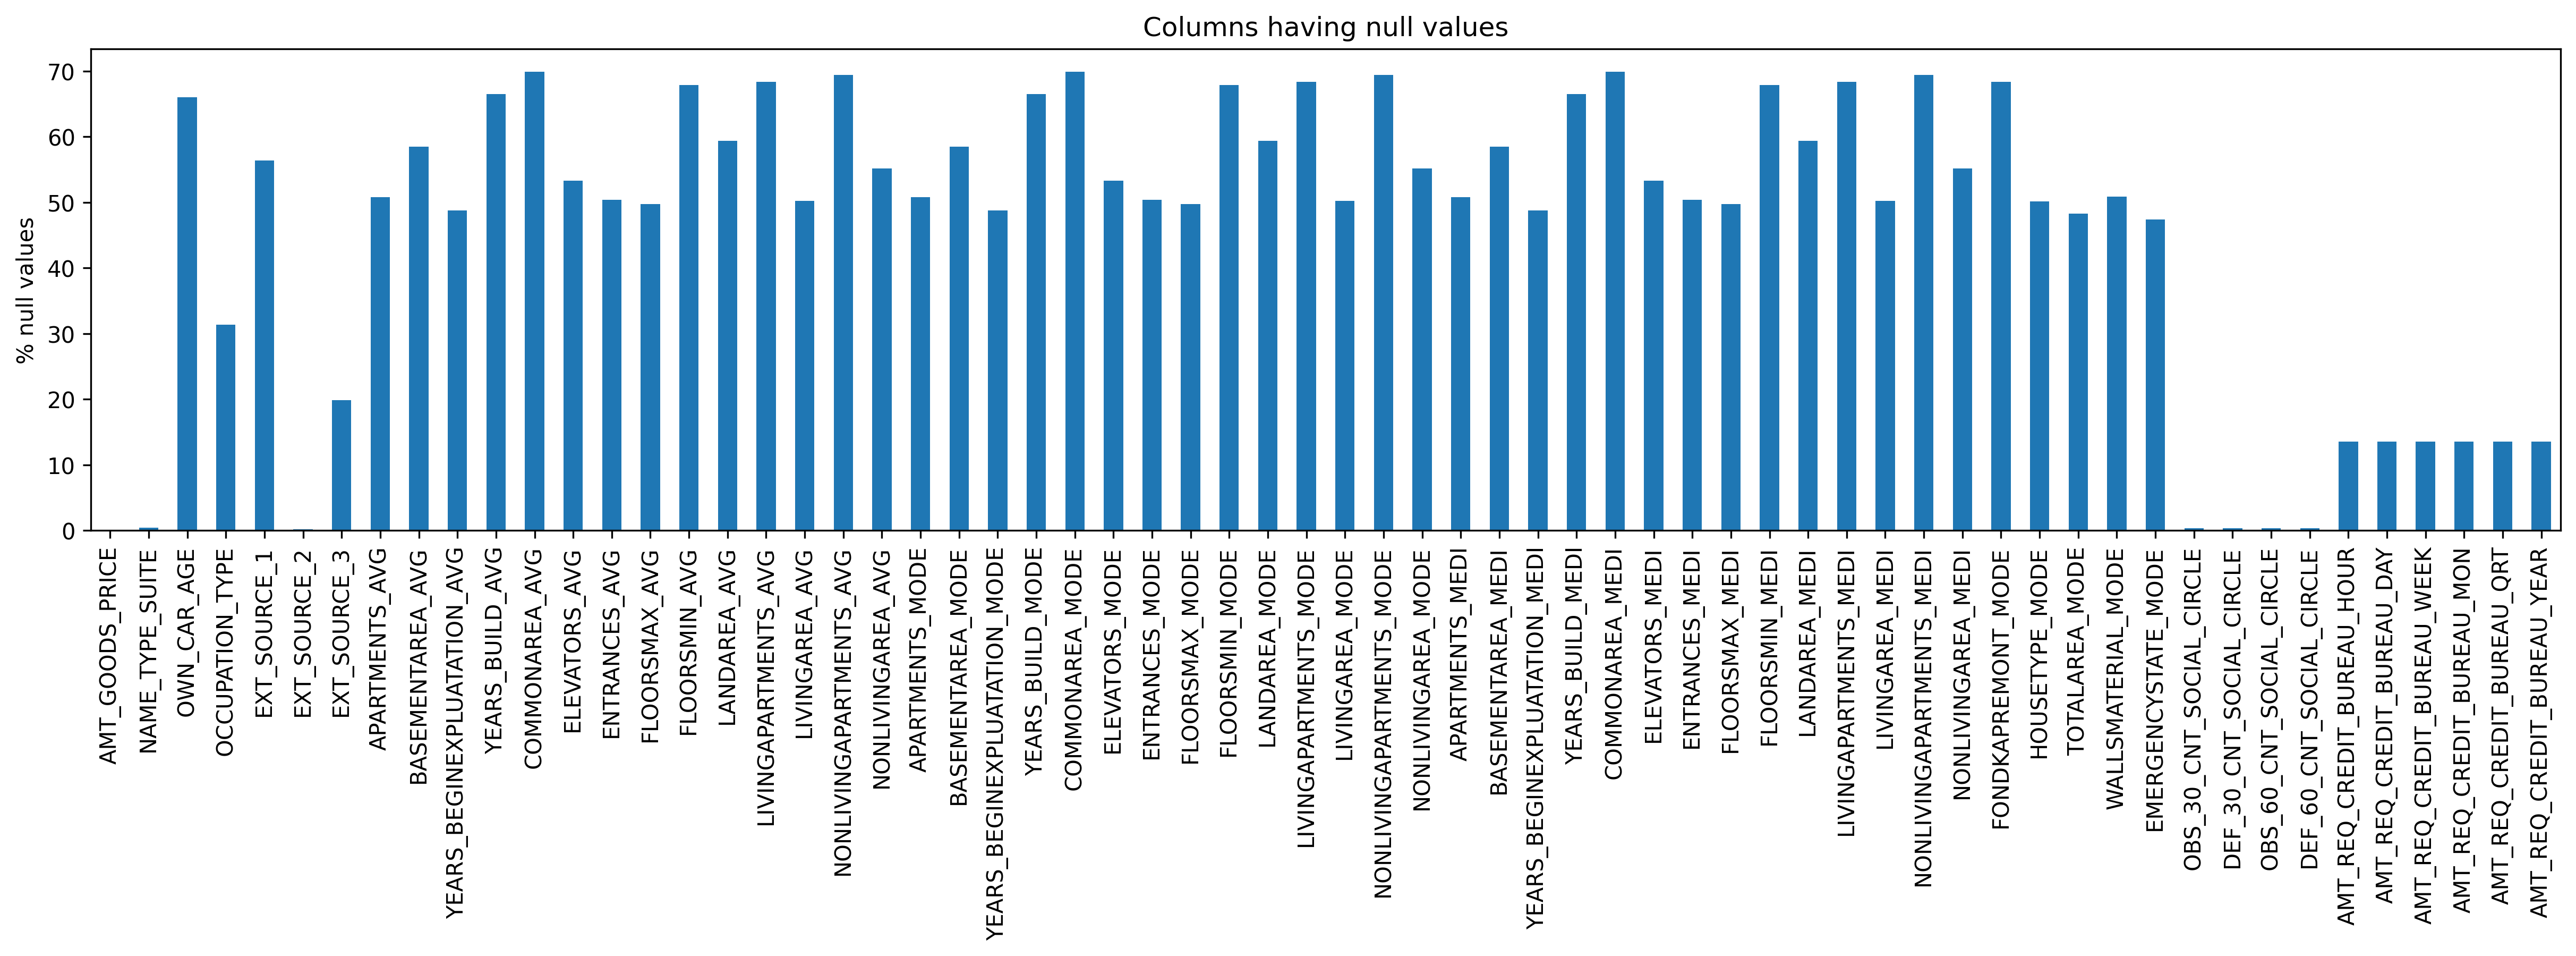

In [25]:
plt.figure(figsize= (20, 4), dpi=300)
col_null_prcnt.plot(kind = 'bar')
plt.title ('Columns having null values')
plt.ylabel('% null values')
plt.show()

In [48]:
#percentage of missing values

round(new_app.isnull().mean() * 100, 2)

SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     13.5
AMT_REQ_CREDIT_BUREAU_WEEK    13.5
AMT_REQ_CREDIT_BUREAU_MON     13.5
AMT_REQ_CREDIT_BUREAU_QRT     13.5
AMT_REQ_CREDIT_BUREAU_YEAR    13.5
Length: 122, dtype: float64

In [51]:
#Deleting all columns with more than 50% null values

new_app = new_app.loc[:,new_app.isnull().mean() <= 0.5]
new_app.shape

(307511, 81)

In [53]:
#Selecting columns with less than 13% null vallues

list(new_app.columns[(new_app.isnull().mean()<=0.13) & (new_app.isnull().mean()>0)])

['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_2',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE']

## Imputating Columns

In [54]:
new_app['EXT_SOURCE_2'].value_counts()

0.285898    721
0.262258    417
0.265256    343
0.159679    322
0.265312    306
           ... 
0.004725      1
0.257313      1
0.282030      1
0.181540      1
0.267834      1
Name: EXT_SOURCE_2, Length: 119831, dtype: int64

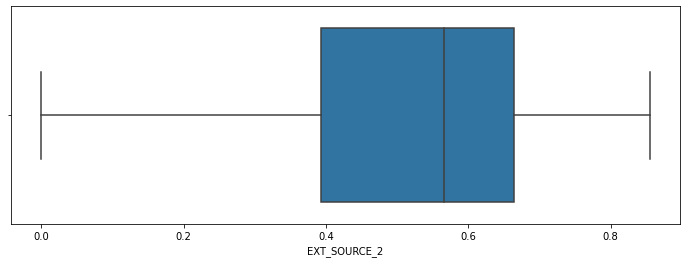

In [63]:
plt.figure(figsize=[12,4])
sns.boxplot(new_app['EXT_SOURCE_2'])
plt.show()

In [59]:
imput_val = round(new_app['EXT_SOURCE_2'].mean(),2)
print(f'EXT_SOURCE_2 has no outlier, so the column can be imputed using the mean of the coumn i.e. {imput_val}')

EXT_SOURCE_2 has no outlier, so the column can be imputed using the mean of the column i.e. 0.51


In [60]:
new_app['AMT_ANNUITY'].value_counts()

9000.0      6385
13500.0     5514
6750.0      2279
10125.0     2035
37800.0     1602
            ... 
79902.0        1
106969.5       1
60885.0        1
59661.0        1
77809.5        1
Name: AMT_ANNUITY, Length: 13672, dtype: int64

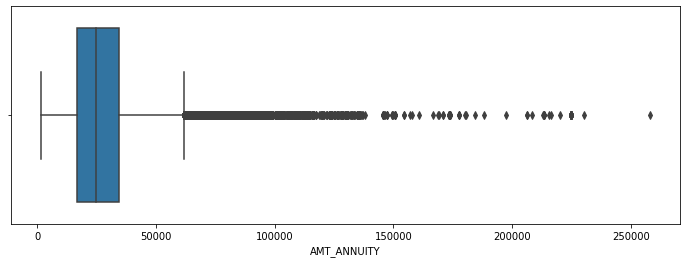

In [62]:
plt.figure(figsize=(12,4))
sns.boxplot(new_app['AMT_ANNUITY'])
plt.show()

In [65]:
imput_val = round(new_app['AMT_ANNUITY'].median(),2)
print(f'AMT_ANNUITY has outliers, so the column can be imputed using the median of the column i.e. {imput_val}')

AMT_ANNUITY has outliers, so the column can be imputed using the median of the column i.e. 24903.0


In [66]:
new_app['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [68]:
imput_val = new_app['NAME_TYPE_SUITE'].mode()
print(f'The column NAME_TYPE_SUITE is categorical, so this column can be imputed using the mode of the column i.e {imput_val[0]}') 

The column NAME_TYPE_SUITE is categorical, so this column can be imputed using the mode of the column i.e Unaccompanied


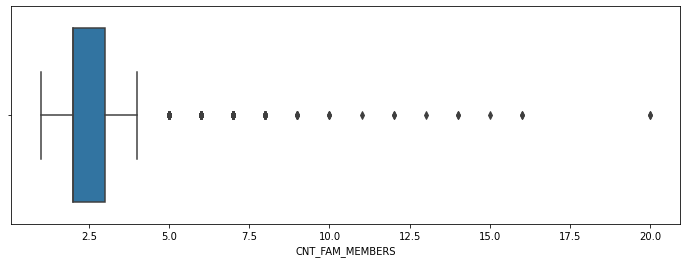

In [71]:
plt.figure(figsize=(12,4))
sns.boxplot(new_app['CNT_FAM_MEMBERS'])
plt.show()

In [78]:
imput_val = round(new_app['CNT_FAM_MEMBERS'].median(),2)
print(f'CNT_FAM_MEMBERS has outliers, the column can be imputed using the median of the column i.e. {imput_val}')

CNT_FAM_MEMBERS has outliers, the column can be imputed using the median of the column i.e. 2.0


In [73]:
new_app['AMT_GOODS_PRICE'].value_counts()

450000.0     26022
225000.0     25282
675000.0     24962
900000.0     15416
270000.0     11428
             ...  
1265751.0        1
503266.5         1
810778.5         1
666090.0         1
743863.5         1
Name: AMT_GOODS_PRICE, Length: 1002, dtype: int64

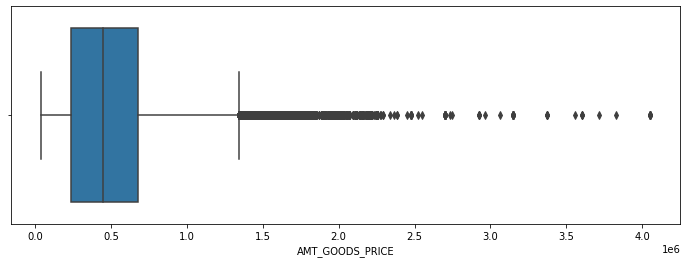

In [75]:
plt.figure(figsize=(12,4))
sns.boxplot(new_app['AMT_GOODS_PRICE'])
plt.show()

In [77]:
imput_val = round(new_app['AMT_GOODS_PRICE'].median(),2)
print(f'AMT_GOODS_PRICE has outliers, the column can be imputed using the median of the column i.e. {imput_val}')

AMT_GOODS_PRICE has outliers, the column can be imputed using the median of the column i.e. 450000.0


## Checking and Converting Data Types

In [79]:
new_app.select_dtypes(include='float64').columns

Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'CNT_FAM_MEMBERS',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG',
       'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

In [81]:
col_convert = ['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
                   'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
                   'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
                   'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
new_app.loc[:,col_convert] = new_app.loc[:,col_convert].apply(lambda col: col.astype('int',errors='ignore'))

In [82]:
col_convert = list(new_app.select_dtypes(include='object').columns)

In [83]:
new_app.loc[:,col_convert] = new_app.loc[:,col_convert].apply(lambda col: col.astype('str',errors='ignore'))

In [84]:
new_app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## Binning Variables

In [85]:
new_app['AMT_INCOME_TOTAL'].quantile([0,0.1,0.3,0.6,0.8,1])

0.0        25650.0
0.1        81000.0
0.3       112500.0
0.6       162000.0
0.8       225000.0
1.0    117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [88]:
new_app['INCOME_GROUP'] = pd.qcut(new_app['AMT_INCOME_TOTAL'],
                                       q=[0,0.1,0.3,0.6,0.8,1],
                                       labels=['Very Low','Low','Medium','High','Very High'])

In [89]:
abs(new_app['DAYS_BIRTH']).quantile([0,0.1,0.3,0.6,0.8,1])

0.0     7489.0
0.1    10284.0
0.3    13140.0
0.6    17220.0
0.8    20474.0
1.0    25229.0
Name: DAYS_BIRTH, dtype: float64

In [90]:
#Creating column 'AGE'
new_app['AGE'] = abs(new_app['DAYS_BIRTH'])//365.25

In [91]:
new_app['AGE'].describe()

count    307511.000000
mean         43.405137
std          11.945779
min          20.000000
25%          33.000000
50%          43.000000
75%          53.000000
max          69.000000
Name: AGE, dtype: float64

In [92]:
#Creating Bins
new_app['AGE_GROUP'] = pd.cut(new_app['AGE'], bins = np.arange(20,71,5))

In [93]:
#Creating column for credi ratio
new_app['CREDIT_INCOME_RATIO'] = round((new_app['AMT_CREDIT'] / new_app['AMT_INCOME_TOTAL']))

In [94]:
new_app['CREDIT_INCOME_RATIO'].describe()

count    307511.000000
mean          3.957426
std           2.706147
min           0.000000
25%           2.000000
50%           3.000000
75%           5.000000
max          85.000000
Name: CREDIT_INCOME_RATIO, dtype: float64

In [95]:
new_app['SOCIAL_CIRCLE_30_DAYS_DEF_PERC'] = new_app['DEF_30_CNT_SOCIAL_CIRCLE'] / new_app['OBS_30_CNT_SOCIAL_CIRCLE']
new_app['SOCIAL_CIRCLE_60_DAYS_DEF_PERC'] = new_app['DEF_60_CNT_SOCIAL_CIRCLE'] / new_app['OBS_60_CNT_SOCIAL_CIRCLE']

## Checking For Imbalance

In [96]:
new_app['TARGET'].value_counts(normalize=True)*100

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

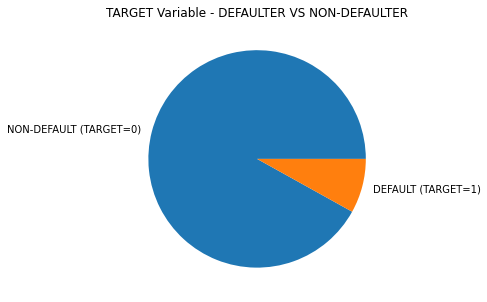

In [100]:
plt.figure(figsize = (10,5))
plt.pie(new_app['TARGET'].value_counts(normalize=True)*100,labels=['NON-DEFAULT (TARGET=0)','DEFAULT (TARGET=1)'])
plt.title('TARGET Variable - DEFAULTER VS NON-DEFAULTER')
plt.show()

In [101]:
final_cols = ['SK_ID_CURR','TARGET','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','INCOME_GROUP','AGE_GROUP','AMT_CREDIT','AMT_INCOME_TOTAL',
'CREDIT_INCOME_RATIO','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','DAYS_EMPLOYED',
'DAYS_REGISTRATION','FLAG_EMAIL','OCCUPATION_TYPE',
'CNT_FAM_MEMBERS','REGION_RATING_CLIENT_W_CITY','ORGANIZATION_TYPE','SOCIAL_CIRCLE_30_DAYS_DEF_PERC',
'SOCIAL_CIRCLE_60_DAYS_DEF_PERC','AMT_REQ_CREDIT_BUREAU_DAY',
'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','NAME_CONTRACT_TYPE','AMT_ANNUITY','REGION_RATING_CLIENT','AMT_GOODS_PRICE']

In [102]:
new_applications = new_app[final_cols]

In [103]:
new_applications.shape

(307511, 30)

In [104]:
#Splitting the dataframe
newapp0 = new_applications[new_applications.TARGET==0]
newapp1 = new_applications[new_applications.TARGET==1]

## Univariate Analysis

In [110]:
#Creating a function to plot univariate variables

def plotunivar_newapp(var):
    sns.despine
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
    
    sns.countplot(x = var, data = newapp0, ax = ax1)
    ax1.set_ylabel('Total Count')
    ax1.set_title(f'Distribution of {var} for Non-Defaulters',fontsize=15)
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
    
    for p in ax1.patches:
        ax1.annotate('{:.1f}%'.format((p.get_height()/len(newapp0))*100), (p.get_x()+0.1, p.get_height()+50))
        
    sns.countplot(x = var, data = newapp1, ax = ax2)
    ax2.set_ylabel('Total Count')
    ax2.set_title(f'Distribution of {var} for Defaulters',fontsize=15)    
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
    
    for p in ax2.patches:
        ax2.annotate('{:.1f}%'.format((p.get_height()/len(newapp1))*100), (p.get_x()+0.1, p.get_height()+50))
    
    plt.show()

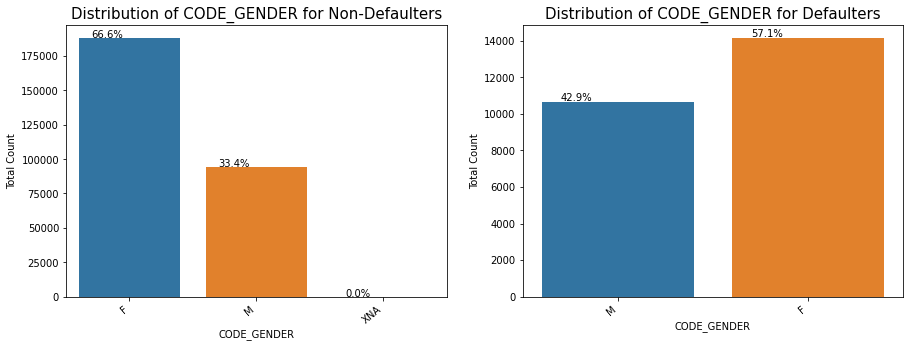

In [111]:
plotunivar_newapp('CODE_GENDER')

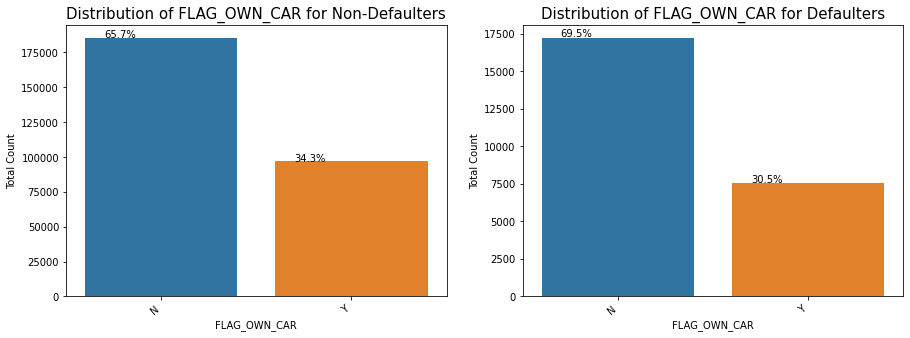

In [112]:
plotunivar_newapp('FLAG_OWN_CAR')

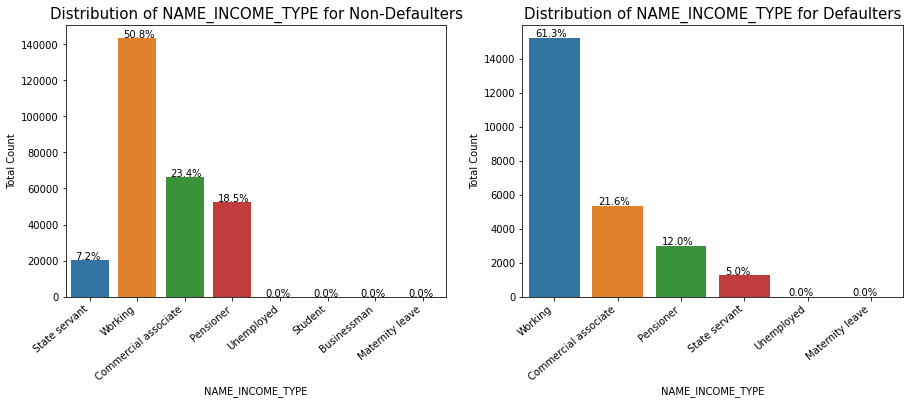

In [113]:
plotunivar_newapp('NAME_INCOME_TYPE')

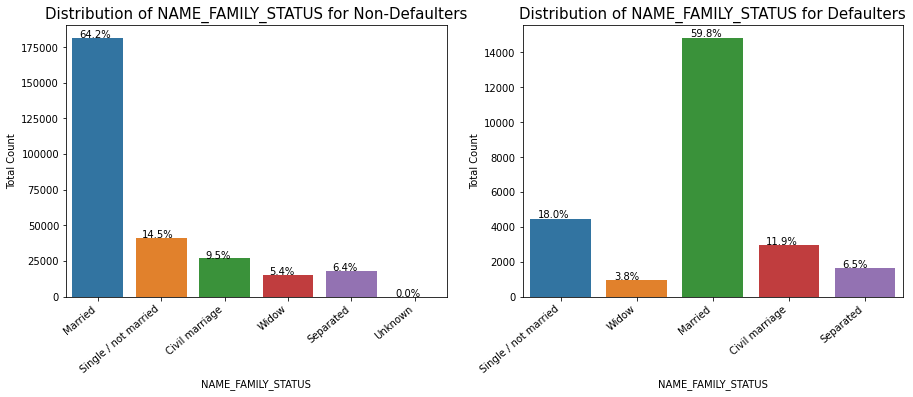

In [114]:
plotunivar_newapp('NAME_FAMILY_STATUS')

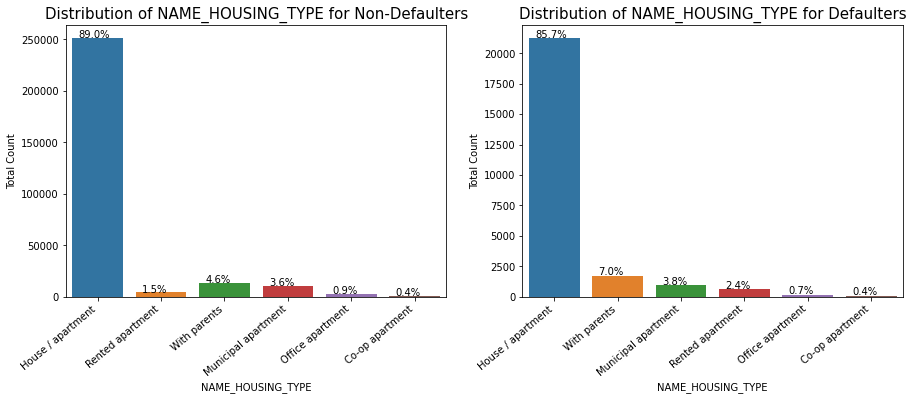

In [115]:
plotunivar_newapp('NAME_HOUSING_TYPE')

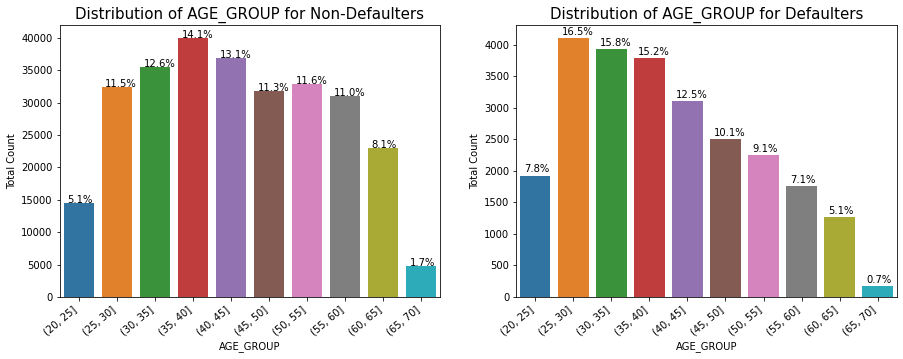

In [116]:
plotunivar_newapp('AGE_GROUP')

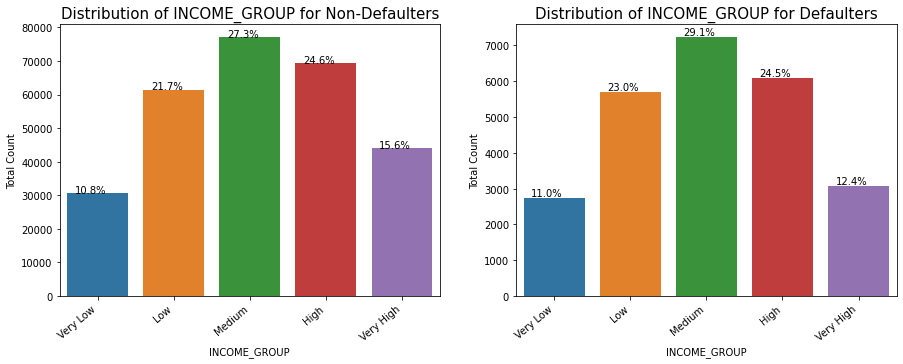

In [117]:
plotunivar_newapp('INCOME_GROUP')

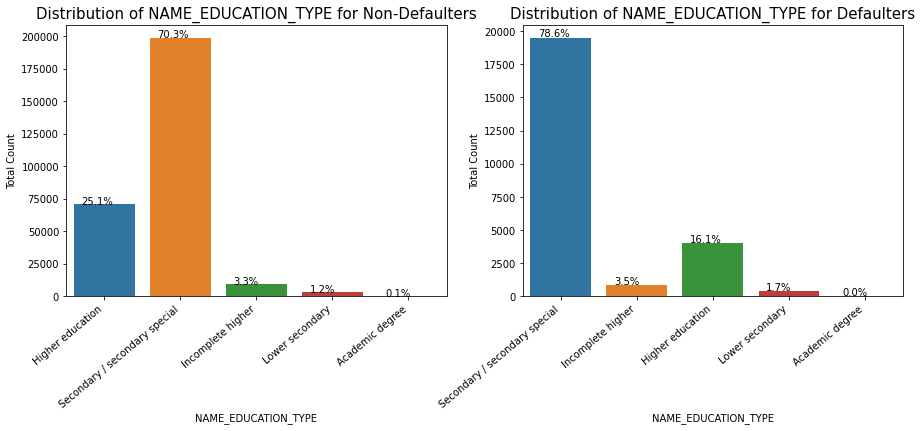

In [118]:
plotunivar_newapp('NAME_EDUCATION_TYPE')

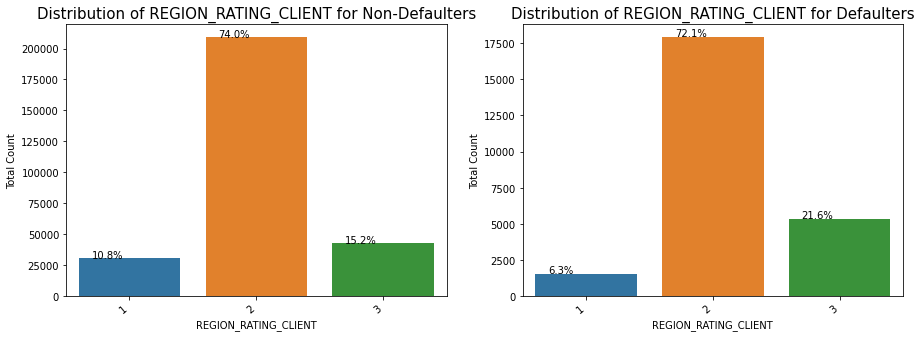

In [119]:
plotunivar_newapp('REGION_RATING_CLIENT')

In [120]:
#Creating a function to plot contionuous variables

def plotunidist(var):

    sns.despine
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
    
    sns.distplot(a = newapp0[var],ax=ax1)

    ax1.set_title(f'Distribution of {var} for Non-Defaulters',fontsize =15)
            
    sns.distplot(a = newapp1[var],ax = ax2)
    ax2.set_title(f'Distribution of {var} for Defaulters',fontsize = 15)    
        
    plt.show()

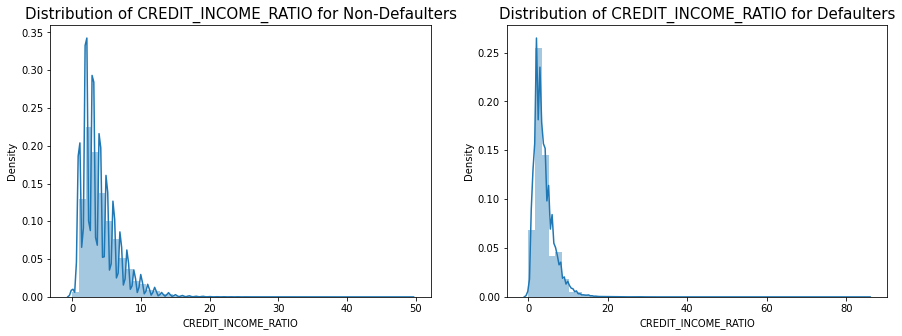

In [121]:
plotunidist('CREDIT_INCOME_RATIO')

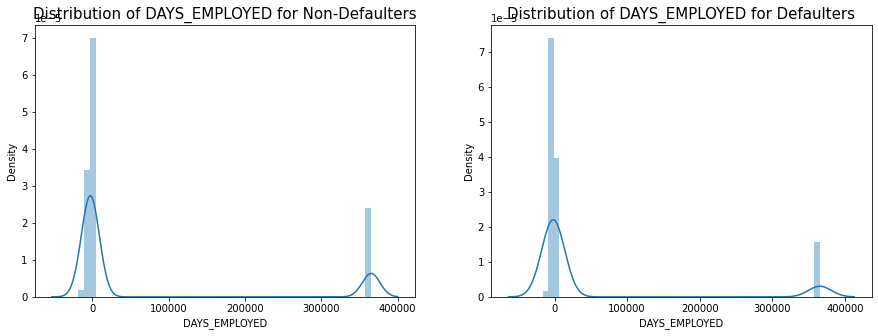

In [122]:
plotunidist('DAYS_EMPLOYED')

In [123]:
newapp1['CNT_FAM_MEMBERS'].value_counts()

2.0     12009
1.0      5675
3.0      4608
4.0      2136
5.0       327
6.0        55
7.0         6
8.0         6
10.0        1
13.0        1
11.0        1
Name: CNT_FAM_MEMBERS, dtype: int64

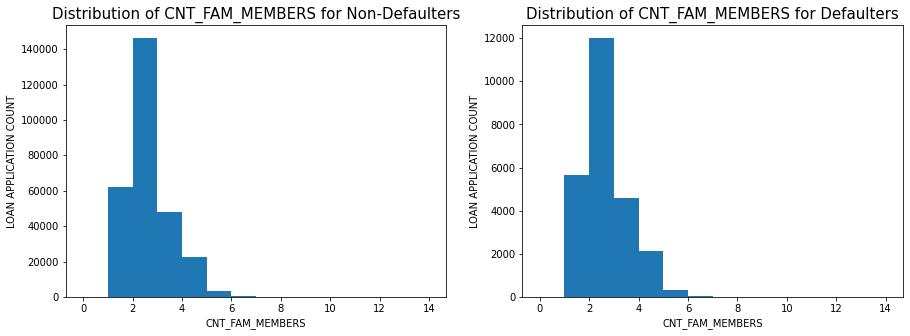

In [124]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
newapp0['CNT_FAM_MEMBERS'].plot.hist(bins=range(15))
plt.title('Distribution of CNT_FAM_MEMBERS for Non-Defaulters',fontsize=15)
plt.xlabel('CNT_FAM_MEMBERS')
plt.ylabel('LOAN APPLICATION COUNT')

plt.subplot(1, 2, 2)
newapp1['CNT_FAM_MEMBERS'].plot.hist(bins=range(15))
plt.title(f'Distribution of CNT_FAM_MEMBERS for Defaulters',fontsize=15)
plt.xlabel('CNT_FAM_MEMBERS')
plt.ylabel('LOAN APPLICATION COUNT')  

plt.show()

## Top ten correlation of Selected Columns

In [127]:
#From newapp0
corr = newapp0.corr()
corr_df = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_df.columns = ['Column1','Column2','Correlation']
corr_df.dropna(subset = ['Correlation'], inplace=True)
corr_df['Abs_Correlation'] = corr_df['Correlation'].abs()
corr_df = corr_df.sort_values(by = ['Abs_Correlation'], ascending=False)
corr_df.head(10)

,Column1,Column2,Correlation,Abs_Correlation
308,AMT_GOODS_PRICE,AMT_CREDIT,0.987250,0.987250
297,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,0.950149,0.950149
208,SOCIAL_CIRCLE_60_DAYS_DEF_PERC,SOCIAL_CIRCLE_30_DAYS_DEF_PERC,0.873003,0.873003
321,AMT_GOODS_PRICE,AMT_ANNUITY,0.776686,0.776686
272,AMT_ANNUITY,AMT_CREDIT,0.771309,0.771309
74,CREDIT_INCOME_RATIO,AMT_CREDIT,0.648590,0.648590
310,AMT_GOODS_PRICE,CREDIT_INCOME_RATIO,0.628747,0.628747
273,AMT_ANNUITY,AMT_INCOME_TOTAL,0.418953,0.418953
274,AMT_ANNUITY,CREDIT_INCOME_RATIO,0.391502,0.391502
309,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.349462,0.349462


In [128]:
#From newapp1
corr = newapp1.corr()
corr_df = corr.where(np.triu(np.ones(corr.shape), k = 1).astype(np.bool)).unstack().reset_index()
corr_df.columns = ['Column1','Column2','Correlation']
corr_df.dropna(subset = ['Correlation'], inplace = True)
corr_df['Abs_Correlation'] = corr_df['Correlation'].abs()
corr_df = corr_df.sort_values(by = ['Abs_Correlation'], ascending = False)
corr_df.head(10)

,Column1,Column2,Correlation,Abs_Correlation
308,AMT_GOODS_PRICE,AMT_CREDIT,0.983103,0.983103
297,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,0.956637,0.956637
208,SOCIAL_CIRCLE_60_DAYS_DEF_PERC,SOCIAL_CIRCLE_30_DAYS_DEF_PERC,0.874562,0.874562
321,AMT_GOODS_PRICE,AMT_ANNUITY,0.752699,0.752699
272,AMT_ANNUITY,AMT_CREDIT,0.752195,0.752195
74,CREDIT_INCOME_RATIO,AMT_CREDIT,0.639744,0.639744
310,AMT_GOODS_PRICE,CREDIT_INCOME_RATIO,0.623163,0.623163
274,AMT_ANNUITY,CREDIT_INCOME_RATIO,0.381298,0.381298
113,DAYS_REGISTRATION,DAYS_EMPLOYED,-0.188929,0.188929
149,CNT_FAM_MEMBERS,DAYS_EMPLOYED,-0.186561,0.186561


## Bivariate Analysis

In [132]:
#Creating a function for scatter plot
def plotbivar(var1,var2):

    sns.despine
    fig,(ax1,ax2) = plt.subplots(1,2,figsize = (15,5))
    
    sns.scatterplot(x = var1, y = var2, data = newapp0, ax = ax1)
    ax1.set_xlabel(var1)    
    ax1.set_ylabel(var2)
    ax1.set_title(f'{var1} vs {var2} for Non-Defaulters',fontsize=15)
    
    sns.scatterplot(x = var1, y = var2, data = newapp1, ax = ax2)
    ax2.set_xlabel(var1)    
    ax2.set_ylabel(var2)
    ax2.set_title(f'{var1} vs {var2} for Defaulters', fontsize = 15)
            
    plt.show()

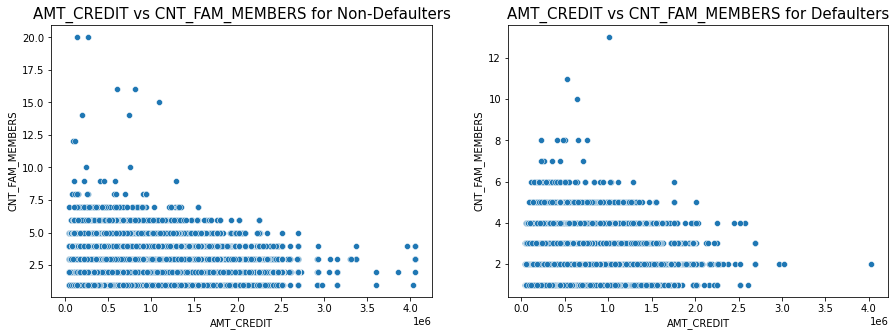

In [130]:
plotbivar('AMT_CREDIT','CNT_FAM_MEMBERS')

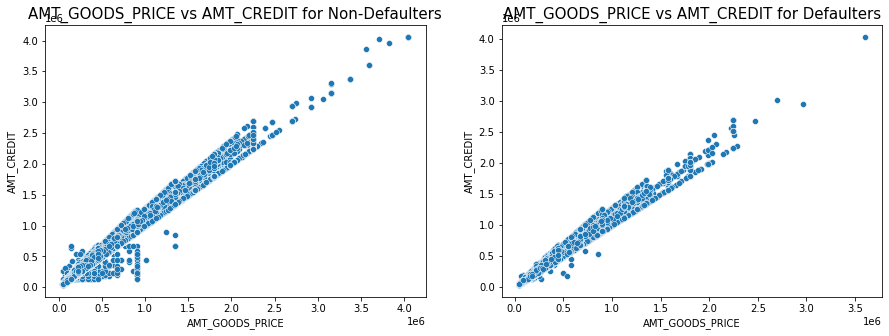

In [131]:
plotbivar('AMT_GOODS_PRICE','AMT_CREDIT')

## Univariate Analysis For Previous Applications

In [133]:
#Creating a function to count plot for categorical variables
def plotunivar_preapp(var):

    sns.despine
    fig,ax = plt.subplots(1,1,figsize = (15,5))
    
    sns.countplot(x = var, data = pre_app, ax = ax, hue = 'NAME_CONTRACT_STATUS')
    ax.set_ylabel('Total Counts')
    ax.set_title(f'Distribution of {var}',fontsize=15)
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha="right")
    
    plt.show()

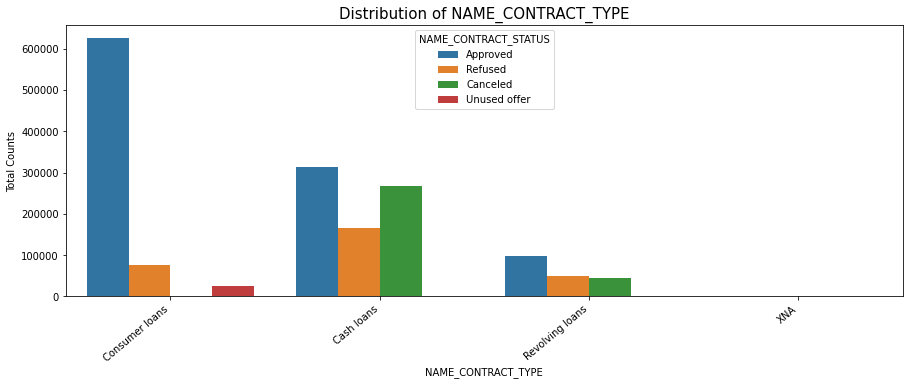

In [134]:
plotunivar_preapp('NAME_CONTRACT_TYPE')

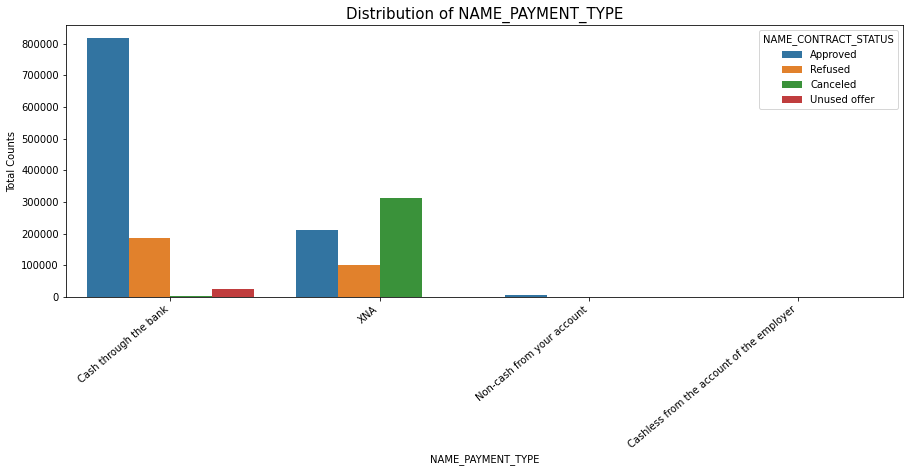

In [135]:
plotunivar_preapp('NAME_PAYMENT_TYPE')

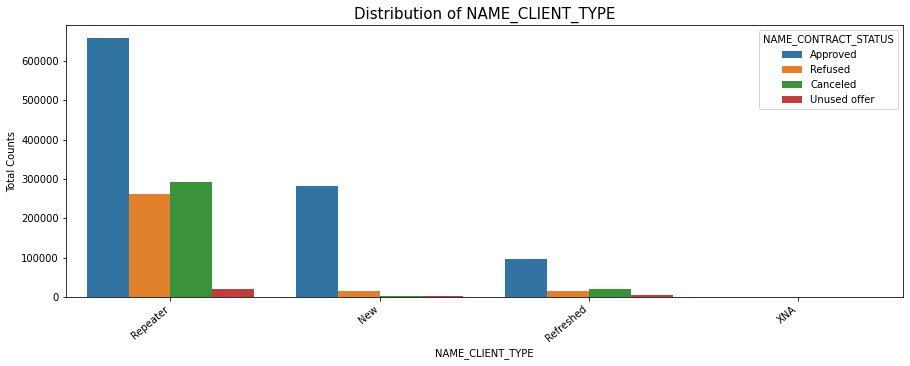

In [136]:
plotunivar_preapp('NAME_CLIENT_TYPE')

## Top ten correlation of Selected Columns

In [137]:
corr= pre_app.corr()
corr_df = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_df.columns=['Column1','Column2','Correlation']
corr_df.dropna(subset=['Correlation'],inplace=True)
corr_df['Abs_Correlation']=corr_df['Correlation'].abs()
corr_df = corr_df.sort_values(by=['Abs_Correlation'], ascending=False)
corr_df.head(10)

,Column1,Column2,Correlation,Abs_Correlation
129,AMT_GOODS_PRICE,AMT_APPLICATION,0.999884,0.999884
130,AMT_GOODS_PRICE,AMT_CREDIT,0.993087,0.993087
87,AMT_CREDIT,AMT_APPLICATION,0.975824,0.975824
417,DAYS_TERMINATION,DAYS_LAST_DUE,0.927990,0.927990
128,AMT_GOODS_PRICE,AMT_ANNUITY,0.820895,0.820895
86,AMT_CREDIT,AMT_ANNUITY,0.816429,0.816429
65,AMT_APPLICATION,AMT_ANNUITY,0.808872,0.808872
372,DAYS_LAST_DUE_1ST_VERSION,DAYS_FIRST_DRAWING,-0.803494,0.803494
297,CNT_PAYMENT,AMT_APPLICATION,0.680630,0.680630
298,CNT_PAYMENT,AMT_CREDIT,0.674278,0.674278


## Bivariate Analysis

<Figure size 1440x720 with 0 Axes>

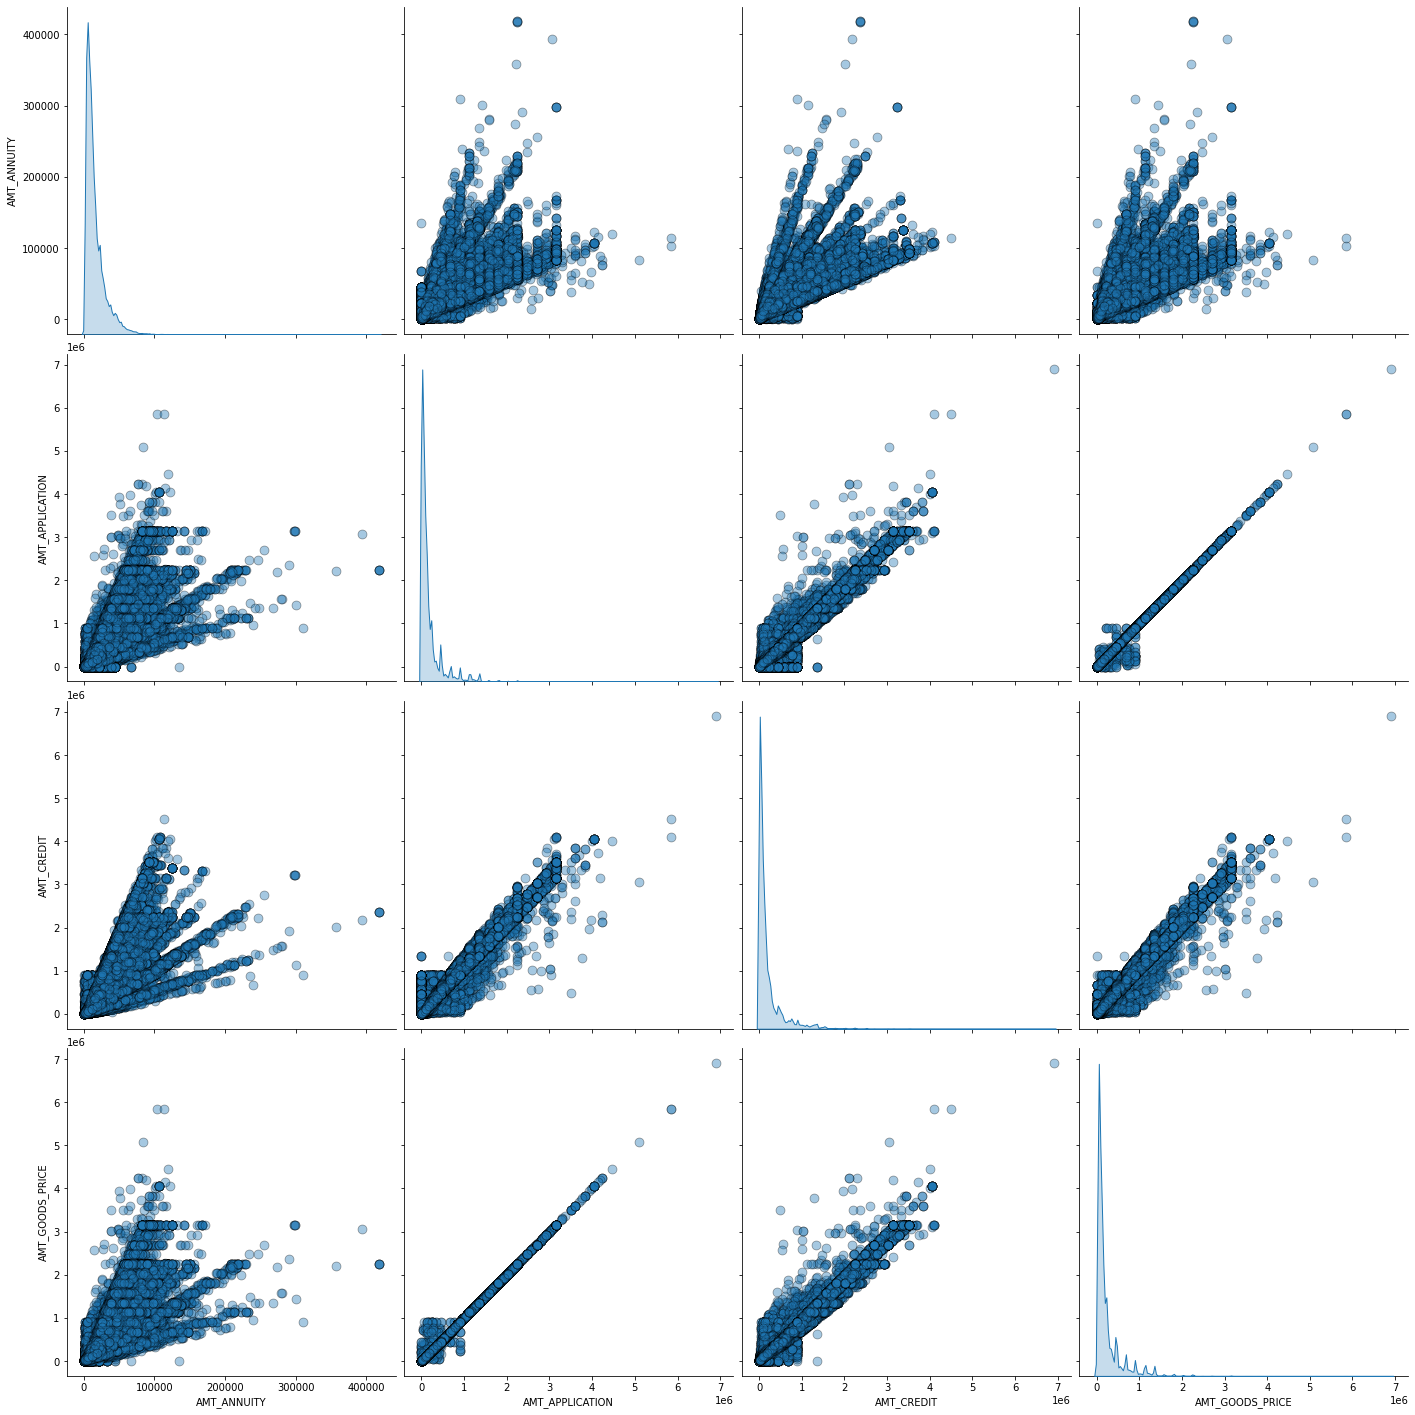

In [138]:
plt.figure(figsize=[20,10])
sns.pairplot(pre_app[['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','NAME_CONTRACT_STATUS']], 
             diag_kind = 'kde', 
             plot_kws = {'alpha': 0.4, 's': 80, 'edgecolor': 'k'},
             size = 5)
plt.show()

In [139]:
#by variant analysis function

def plot_by_cat_num(cat, num):

    sns.despine
    fig,ax = plt.subplots(1,1,figsize=(10,8))
    
    sns.boxenplot(x=cat,y = num, data=pre_app)
    ax.set_ylabel(f'{num}')
    ax.set_xlabel(f'{cat}')

    ax.set_title(f'{cat} Vs {num}',fontsize=15)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
     
    plt.show()

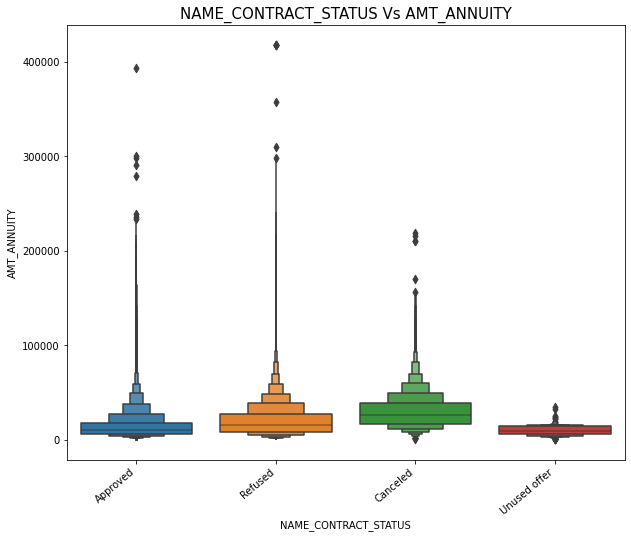

In [140]:
plot_by_cat_num('NAME_CONTRACT_STATUS', 'AMT_ANNUITY')

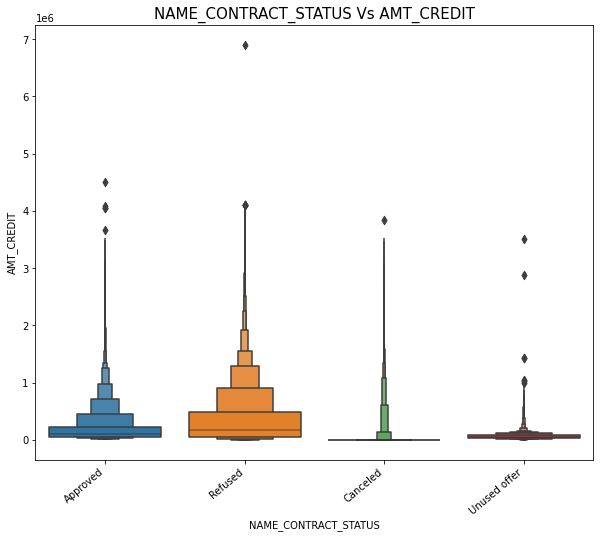

In [141]:
plot_by_cat_num('NAME_CONTRACT_STATUS', 'AMT_CREDIT')

# Merging Both Files

In [142]:
new_and_pre = pd.merge(new_applications, pre_app, how='left', on=['SK_ID_CURR'])

# Checking New File

In [143]:
new_and_pre.shape

(1430155, 66)

In [144]:
new_and_pre.describe()

,SK_ID_CURR,TARGET,AMT_CREDIT_x,AMT_INCOME_TOTAL,CREDIT_INCOME_RATIO,DAYS_EMPLOYED,DAYS_REGISTRATION,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT_W_CITY,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430153e+06,1.430155e+06,...,4791.000000,1.413701e+06,1.413701e+06,1.106488e+06,852595.000000,852595.000000,852595.000000,852595.000000,852595.000000,852595.000000
mean,2.784702e+05,8.624240e-02,5.893386e+05,1.736036e+05,3.772075e+00,6.860209e+04,-5.001275e+03,7.195793e-02,2.149006e+00,2.036176e+00,...,0.771284,-8.803670e+02,3.149878e+02,1.605194e+01,342257.656710,13488.741567,33274.831806,76665.634755,82353.171672,0.330572
std,1.028021e+05,2.807218e-01,3.874204e+05,1.983303e+05,2.612923e+00,1.451967e+05,3.551626e+03,2.584183e-01,9.001579e-01,4.891555e-01,...,0.100644,7.835402e+02,7.695082e+03,1.456675e+01,88832.266598,71650.147146,106161.775933,149704.716371,153537.064274,0.470419
min,1.000020e+05,0.000000e+00,4.500000e+04,2.565000e+04,0.000000e+00,-1.791200e+04,-2.467200e+04,0.000000e+00,1.000000e+00,1.000000e+00,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.893610e+05,0.000000e+00,2.700000e+05,1.125000e+05,2.000000e+00,-2.825000e+03,-7.509000e+03,0.000000e+00,2.000000e+00,2.000000e+00,...,0.715645,-1.313000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1630.000000,-1244.000000,-1316.000000,-1269.000000,0.000000
50%,2.789560e+05,0.000000e+00,5.084955e+05,1.575000e+05,3.000000e+00,-1.277000e+03,-4.506000e+03,0.000000e+00,2.000000e+00,2.000000e+00,...,0.835095,-5.820000e+02,4.000000e+00,1.200000e+01,365243.000000,-825.000000,-358.000000,-534.000000,-494.000000,0.000000
75%,3.675090e+05,0.000000e+00,8.086500e+05,2.115000e+05,5.000000e+00,-2.820000e+02,-1.997000e+03,0.000000e+00,3.000000e+00,2.000000e+00,...,0.852537,-2.710000e+02,8.500000e+01,2.400000e+01,365243.000000,-408.000000,135.000000,-73.000000,-42.000000,1.000000
max,4.562550e+05,1.000000e+00,4.050000e+06,1.170000e+08,8.500000e+01,3.652430e+05,0.000000e+00,1.000000e+00,2.000000e+01,3.000000e+00,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [145]:
new_and_pre.head()

,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,INCOME_GROUP,AGE_GROUP,AMT_CREDIT_x,AMT_INCOME_TOTAL,CREDIT_INCOME_RATIO,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,M,N,Y,High,"(20, 25]",406597.5,202500.0,2.0,...,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,F,N,N,Very High,"(40, 45]",1293502.5,270000.0,5.0,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,F,N,N,Very High,"(40, 45]",1293502.5,270000.0,5.0,...,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,F,N,N,Very High,"(40, 45]",1293502.5,270000.0,5.0,...,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,M,Y,Y,Very Low,"(50, 55]",135000.0,67500.0,2.0,...,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0


In [146]:
new_and_pre.tail()

,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,INCOME_GROUP,AGE_GROUP,AMT_CREDIT_x,AMT_INCOME_TOTAL,CREDIT_INCOME_RATIO,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
1430150,456255,0,F,N,N,Medium,"(45, 50]",675000.0,157500.0,4.0,...,XNA,24.0,middle,Cash X-Sell: middle,365243.0,-618.0,72.0,-558.0,-528.0,1.0
1430151,456255,0,F,N,N,Medium,"(45, 50]",675000.0,157500.0,4.0,...,Connectivity,0.0,XNA,Card Street,NaN,NaN,NaN,NaN,NaN,NaN
1430152,456255,0,F,N,N,Medium,"(45, 50]",675000.0,157500.0,4.0,...,XNA,60.0,low_normal,Cash Street: low,NaN,NaN,NaN,NaN,NaN,NaN
1430153,456255,0,F,N,N,Medium,"(45, 50]",675000.0,157500.0,4.0,...,XNA,36.0,low_normal,Cash X-Sell: low,365243.0,-756.0,294.0,-66.0,-64.0,0.0
1430154,456255,0,F,N,N,Medium,"(45, 50]",675000.0,157500.0,4.0,...,Connectivity,6.0,high,POS mobile with interest,365243.0,-469.0,-319.0,-409.0,-400.0,0.0


In [147]:
new_and_pre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1430155 entries, 0 to 1430154
Data columns (total 66 columns):
 #   Column                          Non-Null Count    Dtype   
---  ------                          --------------    -----   
 0   SK_ID_CURR                      1430155 non-null  int64   
 1   TARGET                          1430155 non-null  int64   
 2   CODE_GENDER                     1430155 non-null  object  
 3   FLAG_OWN_CAR                    1430155 non-null  object  
 4   FLAG_OWN_REALTY                 1430155 non-null  object  
 5   INCOME_GROUP                    1430155 non-null  category
 6   AGE_GROUP                       1430151 non-null  category
 7   AMT_CREDIT_x                    1430155 non-null  float64 
 8   AMT_INCOME_TOTAL                1430155 non-null  float64 
 9   CREDIT_INCOME_RATIO             1430155 non-null  float64 
 10  NAME_INCOME_TYPE                1430155 non-null  object  
 11  NAME_EDUCATION_TYPE             1430155 non-null  

In [148]:
def plot_merged(Varx,Vary):
    
    sns.despine
    newData = new_and_pre.pivot_table(values='SK_ID_CURR', 
                      index=Varx,
                      columns=Vary,
                      aggfunc='count')
    newData = newData.div(newData.sum(axis=1),axis='rows')*100
    sns.set()
    newData.plot(kind='bar',stacked=True,figsize=(15,5))
    plt.title(f'Effect Of {Varx} on Loan Approval')
    plt.xlabel(f'{Varx}')
    plt.ylabel(f'{Vary}%')
    plt.show()

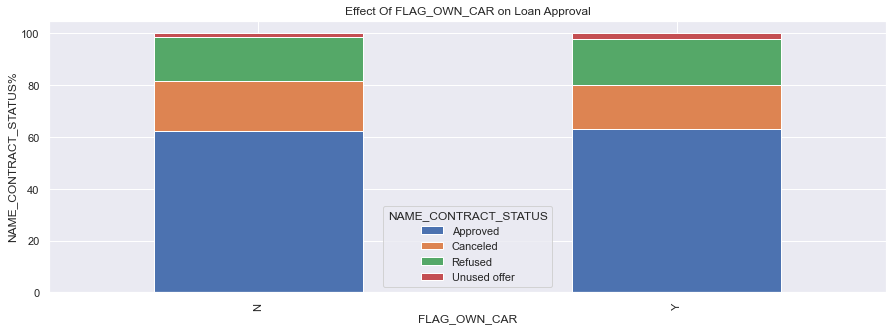

In [149]:
plot_merged('FLAG_OWN_CAR','NAME_CONTRACT_STATUS')

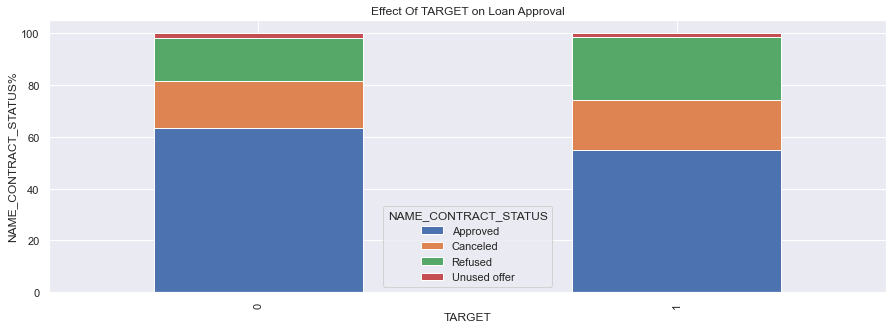

In [151]:
plot_merged('TARGET','NAME_CONTRACT_STATUS')